# The z-Distribution

<b>Estares, Nicholai Ralph G.</b>
<br>Computer Engineering Technology

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
df = pd.read_csv(r"transformer-voltage.csv")

In [ ]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sample   30 non-null     int64  
 1   Voltage  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [ ]:
df.describe()

,Sample,Voltage
count,30.000000,30.000000
mean,15.500000,120.290000
std,8.803408,1.243285
min,1.000000,117.000000
25%,8.250000,119.700000
50%,15.500000,120.100000
75%,22.750000,120.500000
max,30.000000,123.800000


In [ ]:
alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha/2)
print(f"Z-critical value for 95% confidence interval: {z_critical}")

Z-critical value for 95% confidence interval: 1.959963984540054


In [ ]:
pop_std = 5

ci_lower, ci_upper = stats.norm.interval(
    confidence=0.95,
    loc = df['Voltage'].mean(),
    scale = pop_std / np.sqrt(df['Voltage'].count())
    )
print(f"95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")

95% Confidence Interval: (118.50, 122.08)


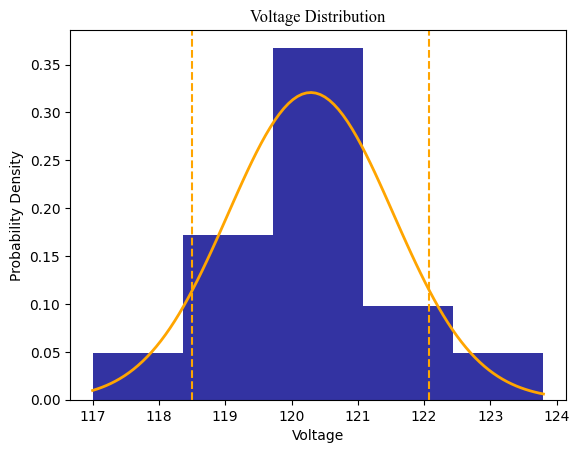

In [ ]:
mean = df['Voltage'].mean()
std = df['Voltage'].std()

x_min = df['Voltage'].min()
x_max = df['Voltage'].max()

x = np.linspace(x_min, x_max, 100)
p = stats.norm.pdf(x, mean, std)
plt.plot (x,p,
          linewidth=2,
          color='orange')

plt.hist(df['Voltage'],
         bins=5,
         density=True,
         alpha=0.8,
         color='darkblue')

plt.title('Voltage Distribution', font = 'Times New Roman', fontsize=12)
plt.xlabel('Voltage')
plt.ylabel('Probability Density')

plt.axvline(x = ci_lower, color='orange', linestyle='--', label='95% CI Lower Bound')
plt.axvline(x = ci_upper, color='orange', linestyle='--', label='95% CI Upper Bound')
plt.show()